# Deep Learning Overview

This tutorial accompanies the [lecture on Deep Learning Basics](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U) given as part of [MIT Deep Learning](https://deeplearning.mit.edu). Acknowledgement to amazing people involved is provided throughout the tutorial and at the end. You can watch the video on YouTube:

[![Deep Learning Basics](https://i.imgur.com/FfQVV8q.png)](https://www.youtube.com/watch?list=PLrAXtmErZgOeiKm4sgNOknGvNjby9efdf&v=O5xeyoRL95U)

In this tutorial, we mention seven important types/concepts/approaches in deep learning, introducing the first 2 and providing pointers to tutorials on the others. Here is a visual representation of the seven:

![Deep learning concepts](https://i.imgur.com/EAl47rp.png)

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. 
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. 
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas. See Einstein quote...

# Generative Adversarial Network (GAN)
GANs are a form of neural network in which two sub-networks (the encoder and decoder) are trained on opposing loss functions: an encoder that is trained to produce data which is indiscernable from the true data, and a decoder that is trained to discern between the data and generated data.

생성적 적대 신경망 (Generative Adversarial Networks, GANs)은 요즘 컴퓨터 과학에서 가장 흥미로운 아이디어 중 하나입니다. 두개의 모델이 적대적인 과정을 통해 동시에 훈련됩니다. 생성자 (Generator, "모조품화가")는 진짜처럼 보이는 이미지를 생성하도록 배우는 와중에, 감별자 (Discriminator,"진품감정사")는 가짜의 이미지로부터 진짜를 구별하게 되는 것을 배우게 됩니다.

![생성자와 감별자를 그린 도표](https://tensorflow.org/tutorials/generative/images/gan1.png)

훈련과정 동안 *생성자*는 점차 실제같은 이미지를 더 잘 생성하게 되고, *감별자*는 점차 진짜와 가짜를 더 잘 구별하게됩니다. 이 과정은 *감별자*가 가짜 이미지에서 진짜 이미지를 더이상 구별하지 못하게 될때, 평형상태에 도달하게 됩니다. 

![생성자와 감별자를 그린 두번째 도표](https://tensorflow.org/tutorials/generative/images/gan2.png)




## GAN Model Architecture

<img src="https://i.imgur.com/LweaD1s.png" width="600px">

  - The GAN model architecture involves two sub-models
    - Generator. Model that is used to generate new plausible examples from the problem domain.
    - Discriminator. Model that is used to classify examples as real (from the domain) or fake (generated).
  - GANs are based on a game theoretic scenario in which the generator network must compete against an adversary. 
    - The generator network directly produces samples. 
    - Its adversary, the discriminator network, attempts to distinguish between samples drawn from the training data and samples drawn from the generator.
    - They  are playing a zero-sum game.
  - Generative modeling is an unsupervised learning problem, although a clever property of the GAN architecture is that the training of the generative model is framed as a supervised learning problem.


There are broadly 3 categories of GANs:

  - Unsupervised GANs: The generator network takes random noise as input and produces a photo-realistic image that appears very similar to images that appear in the training dataset. 
    - Examples: the original GAN, DC-GAN(Deep Convolutional GAN), pg-GAN(Progressive Growing of GAN), etc.
  - Style-Transfer GANs - Translate images from one domain to another (e.g., from horse to zebra, from sketch to colored images). 
    - Examples: CycleGAN and pix2pix.
- Conditional GANs - Jointly learn on features along with images to generate images conditioned on those features (e.g., generating an instance of a particular class).    
   - Examples: Conditional GAN, AC-GAN(Auxiliary classifier GAN), Stack-GAN, and BigGAN.

### How to train a GAN

  - Discriminator

  <img src='https://developers.google.com/machine-learning/gan/images/gan_diagram_discriminator.svg'>

    - The discriminator classifies both real data and fake data from the generator.
    - The discriminator loss penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real.
    - The discriminator updates its weights through backpropagation from the discriminator loss through the discriminator network.
    - During discriminator training the generator does not train. 

  - Using the Discriminator to Train the Generator

    - Sample random noise.
    - Produce generator output from sampled random noise.
    - Get discriminator "Real" or "Fake" classification for generator output.
    - Calculate loss from discriminator classification.
    - Backpropagate through both the discriminator and generator to obtain gradients.
    - Use gradients to change only the generator weights.
    <img src = 'https://developers.google.com/machine-learning/gan/images/gan_diagram_generator.svg'>

  
#### GAN Training

<img src='https://929687.smushcdn.com/2407837/wp-content/uploads/2020/11/keras_gans_steps.png?lossy=1&strip=1&webp=0'>

Because a GAN contains two separately trained networks, its training algorithm must address two complications:

  - GANs must juggle two different kinds of training (generator and discriminator).
  - GAN convergence is hard to identify.

__Alternating Training__

The generator and the discriminator have different training processes. So how do we train the GAN as a whole?

GAN training proceeds in alternating periods:

  - The discriminator trains for one or more epochs.
  - The generator trains for one or more epochs.
  - Repeat steps 1 and 2 to continue to train the generator and discriminator networks.

__Note__

  1. We keep the generator constant during the discriminator training phase. 
  2. Similarly, we keep the discriminator constant during the generator training phase.
  3. When training GANs, our goal is not to seek a minimum loss value but instead to find some equilibrium between the two.
  4. This concept of finding an equilibrium may make sense on paper, but once you try to implement and train your own GANs, you’ll find that this is a nontrivial process.

__Convergence__

  - As the generator improves with training, the discriminator performance gets worse because the discriminator can't easily tell the difference between real and fake. If the generator succeeds perfectly, then the discriminator has a 50% accuracy. In effect, the discriminator flips a coin to make its prediction.

  - This progression poses a problem for convergence of the GAN as a whole: the discriminator feedback gets less meaningful over time. If the GAN continues training past the point when the discriminator is giving completely random feedback, then the generator starts to train on junk feedback, and its own quality may collapse.

 













### The loss function

<img src='https://editor.analyticsvidhya.com/uploads/68909architecture.PNG'>

  - $G$:	Generator Model
  - $D$:	Discriminator Model
  - $z$:	Random Noise (Fixed size input vector)
  - $x$:	Real Image
  - $G(z)$	Image generated by Generator (Fake Image)
  - $p_{data}(x)$	Probability Distribution of Real Images
  - $p_z(z)$	Probability Distribution of Fake Images
  - $D(G(z))$	Discriminator’s output when the generated image is an input
  - $D(x)$	Discriminator’s output when the real image is an input

The fight between the Generator Model and the Discriminator Model can be expressed mathematically as:

<img src='https://editor.analyticsvidhya.com/uploads/26563gan-equation.png'>

As we can see in the equation, the Generator wants to minimize the V(D, G) whereas the  Discriminator wants to maximize the V(D, G). Let us understand both terms:

  - $E_{x \sim p_{data}(x)} [\log D(x)]$: Average log probability of D when real image is input.
  - $E_{z \sim p_z(z)} [\log(1 – D(G(z)))]$: Average log probability of D when the generated image is input.


#### Discriminator’s perspective

The Discriminator wants to maximize the loss function $V(D, G)$ by correctly classifying real and fake images.

The first term suggests that the Discriminator wants to make $D(x)$ as close to 1 as possible, i.e. correctly classifying real images as real.

The second term suggests that the Discriminator wants to make $D(G(x))$ as close to 0 as possible, i.e. correctly classifying fake images as fake and thus maximize the term eventually (1 – smaller number will result in a larger number). Note: Probability lies in the range of 0-1.

Thus, The Discriminator tries to maximize both the terms.

#### Generator’s perspective

The Generator wants to minimize the loss function $V(D, G)$ by generating images that look like real images and tries to fool the Discriminator. 

The second term suggests that the Generator wants to make $D(G(z))$ as close to 1 (instead of 0) as possible and thus minimize the term eventually (1 – larger number will result in a smaller number). So that the Discriminator fails and misclassifies the images.

Thus, The Generator tries to minimize the second term.

## Amazing Applications of GAN

 - [Image to Image Translation] (https://arxiv.org/abs/1611.07004)

<img src = 'https://editor.analyticsvidhya.com/uploads/73176img-to-img-translation.PNG'>

  - [Text to Image Translation] (https://arxiv.org/abs/1610.02454)

<img src='https://editor.analyticsvidhya.com/uploads/37782text-image-translation.PNG'>

  - [Photos to Emojis](https://arxiv.org/abs/1611.02200)

<img src='https://editor.analyticsvidhya.com/uploads/12712photos-to-emoji.PNG'>

  - [Synthesizing High-Resolution Images with NVIDIA StyleGAN2](https://www.youtube.com/watch?v=9QuDh3W3lOY)

<img src='https://raw.githubusercontent.com/lucidrains/stylegan2-pytorch/master/samples/celebrities.jpg'>

## GAN Code Examples


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, ZeroPadding2D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import UpSampling2D, Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import sys
import numpy as np
from tqdm import tqdm_notebook

### Original GAN

In [ ]:
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % epoch)
        plt.close()


In [ ]:
gan = GAN()
gan.train(epochs=30000, batch_size=32, sample_interval=200)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
25000 [D loss: 0.640317, acc.: 68.75%] [G loss: 1.073584]
25001 [D loss: 0.683500, acc.: 60.94%] [G loss: 1.032904]
25002 [D loss: 0.671469, acc.: 56.25%] [G loss: 1.110714]
25003 [D loss: 0.590590, acc.: 65.62%] [G loss: 0.916187]
25004 [D loss: 0.698996, acc.: 57.81%] [G loss: 0.951874]
25005 [D loss: 0.620053, acc.: 70.31%] [G loss: 1.043492]
25006 [D loss: 0.539142, acc.: 71.88%] [G loss: 1.156022]
25007 [D loss: 0.705365, acc.: 60.94%] [G loss: 1.062478]
25008 [D loss: 0.657726, acc.: 54.69%] [G loss: 1.012158]
25009 [D loss: 0.621336, acc.: 70.31%] [G loss: 1.072535]
25010 [D loss: 0.590136, acc.: 68.75%] [G loss: 1.014924]
25011 [D loss: 0.677258, acc.: 57.81%] [G loss: 1.057217]
25012 [D loss: 0.696316, acc.: 67.19%] [G loss: 0.989548]
25013 [D loss: 0.516452, acc.: 78.12%] [G loss: 1.133175]
25014 [D loss: 0.547925, acc.: 71.88%] [G loss: 1.014526]
25015 [D loss: 0.629795, acc.: 68.75%] [G loss: 0.962445]
25016 [D loss: 0.612016, acc.: 71.88

In [ ]:
# example of loading the fashion_mnist dataset
from keras.datasets.fashion_mnist import load_data
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# summarize the shape of the dataset
print('Train', trainX.shape, trainy.shape)
print('Test', testX.shape, testy.shape)



4431872/4422102 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


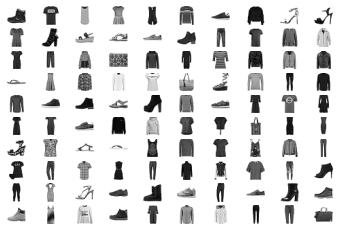

In [ ]:
from keras.datasets.fashion_mnist import load_data
from matplotlib import pyplot
# load the images into memory
(trainX, trainy), (testX, testy) = load_data()
# plot images from the training dataset
for i in range(100):
	# define subplot
	pyplot.subplot(10, 10, 1 + i)
	# turn off axis
	pyplot.axis('off')
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap='gray_r')
pyplot.show()

### Unconditional GAN for Fashion-MNIST

In [ ]:
def define_discriminator(in_shape=(28,28,1)):
	model = Sequential()
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	# downsample
	model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# classifier
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [ ]:
def define_generator(latent_dim):
	model = Sequential()
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	model.add(Dense(n_nodes, input_dim=latent_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 128)))
	# upsample to 14x14
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# upsample to 28x28
	model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	# generate
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model

In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [ ]:
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, _), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = tf.expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return X

In [ ]:
# select real samples
def generate_real_samples(dataset, n_samples):
	# choose random instances
	ix = tf.experimental.numpy.random.randint(0, dataset.shape[0], n_samples)
	# select images
	X = dataset[ix]
	# generate class labels
	y = tf.ones((n_samples, 1))
	return X, y

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = tf.experimental.numpy.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = tf.zeros((n_samples, 1))
	return X, y

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			X_real, y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch(X_real, y_real)
			# generate 'fake' examples
			X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
			# prepare points in latent space as input for the generator
			X_gan = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = tf.ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch(X_gan, y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('generator.h5')

In [ ]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
>90, 150/468, d1=0.697, d2=0.690 g=0.700
>90, 151/468, d1=0.701, d2=0.692 g=0.709
>90, 152/468, d1=0.700, d2=0.690 g=0.712
>90, 153/468, d1=0.696, d2=0.687 g=0.698
>90, 154/468, d1=0.703, d2=0.689 g=0.716
>90, 155/468, d1=0.693, d2=0.688 g=0.709
>90, 156/468, d1=0.701, d2=0.682 g=0.709
>90, 157/468, d1=0.701, d2=0.685 g=0.706
>90, 158/468, d1=0.698, d2=0.687 g=0.706
>90, 159/468, d1=0.697, d2=0.690 g=0.701
>90, 160/468, d1=0.690, d2=0.698 g=0.701
>90, 161/468, d1=0.698, d2=0.695 g=0.705
>90, 162/468, d1=0.697, d2=0.689 g=0.707
>90, 163/468, d1=0.689, d2=0.694 g=0.707
>90, 164/468, d1=0.696, d2=0.688 g=0.708
>90, 165/468, d1=0.701, d2=0.686 g=0.707
>90, 166/468, d1=0.691, d2=0.692 g=0.699
>90, 167/468, d1=0.687, d2=0.695 g=0.694
>90, 168/468, d1=0.700, d2=0.700 g=0.701
>90, 169/468, d1=0.703, d2=0.694 g=0.705
>90, 170/468, d1=0.693, d2=0.689 g=0.706
>90, 171/468, d1=0.696, d2=0.687 g=0.707
>90, 172/468, d1=0.694, d2=0.693 g=0.711
>90, 173/468, d1=0.70

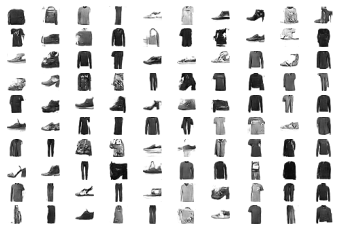

In [ ]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input
 
# create and save a plot of generated images (reversed grayscale)
def show_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()
 
# load model
model = load_model('generator.h5')
# generate images
latent_points = generate_latent_points(100, 100)
# generate images
X = model.predict(latent_points)
# plot the result
show_plot(X, 10)

### Conditional GAN for Fashion-MNIST

In [ ]:
from tensorflow.keras.layers import Embedding, Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

In [ ]:
discriminator = define_discriminator(in_shape=(28,28,1), n_classes=10)
discriminator.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        500         input_7[0][0]                    
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 1, 784)       39984       embedding[0][0]                  
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
____________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


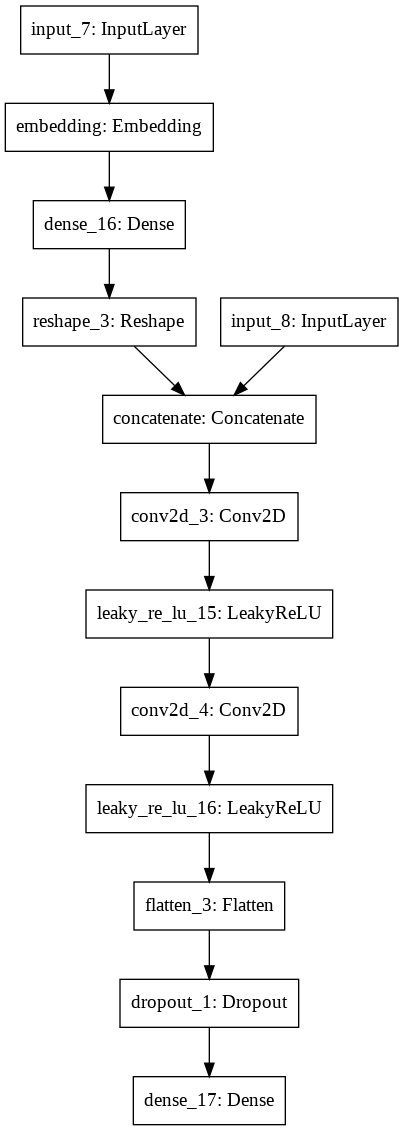

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(discriminator)

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

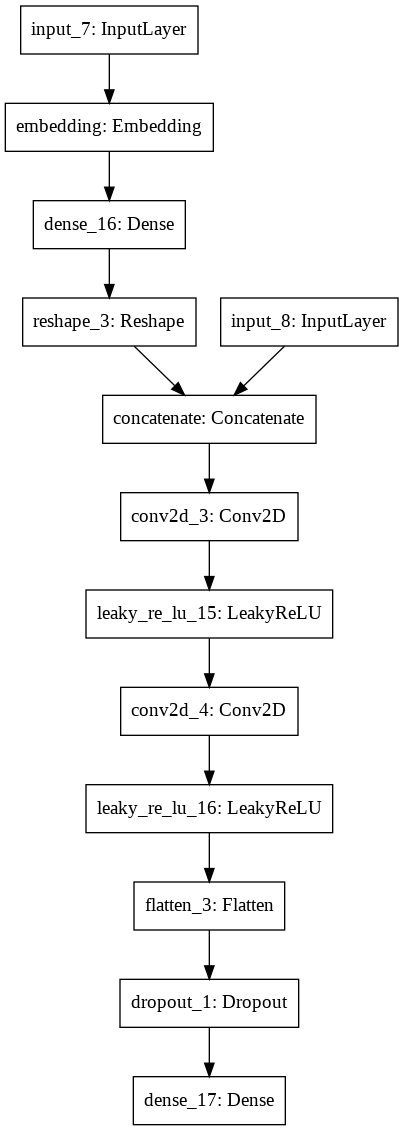

In [ ]:
from tensorflow.keras.utils import plot_model

generator = define_generator(latent_dim, n_classes=10) 
plot_model(discriminator)

In [ ]:
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

In [ ]:
# example of training an conditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Concatenate

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]

# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
>90, 150/468, d1=0.674, d2=0.693 g=0.759
>90, 151/468, d1=0.703, d2=0.691 g=0.756
>90, 152/468, d1=0.658, d2=0.701 g=0.746
>90, 153/468, d1=0.693, d2=0.637 g=0.748
>90, 154/468, d1=0.671, d2=0.658 g=0.740
>90, 155/468, d1=0.694, d2=0.668 g=0.757
>90, 156/468, d1=0.699, d2=0.687 g=0.750
>90, 157/468, d1=0.680, d2=0.659 g=0.748
>90, 158/468, d1=0.654, d2=0.697 g=0.739
>90, 159/468, d1=0.710, d2=0.691 g=0.750
>90, 160/468, d1=0.655, d2=0.706 g=0.753
>90, 161/468, d1=0.716, d2=0.691 g=0.744
>90, 162/468, d1=0.692, d2=0.662 g=0.745
>90, 163/468, d1=0.700, d2=0.679 g=0.735
>90, 164/468, d1=0.701, d2=0.655 g=0.739
>90, 165/468, d1=0.690, d2=0.711 g=0.728
>90, 166/468, d1=0.669, d2=0.665 g=0.772
>90, 167/468, d1=0.707, d2=0.641 g=0.763
>90, 168/468, d1=0.665, d2=0.710 g=0.762
>90, 169/468, d1=0.659, d2=0.650 g=0.760
>90, 170/468, d1=0.675, d2=0.676 g=0.771
>90, 171/468, d1=0.686, d2=0.669 g=0.736
>90, 172/468, d1=0.686, d2=0.684 g=0.751
>90, 173/468, d1=0.68

### Conditional Clothing Generation

In this section, we will use the trained generator model to conditionally generate new photos of items of clothing.

We can update our code example for generating new images with the model to now generate images conditional on the class label. We can generate 10 examples for each class label in columns.


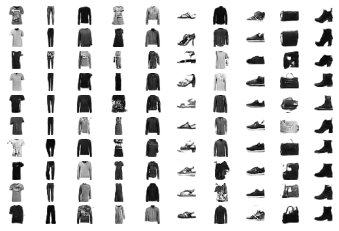

In [ ]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

# load model
model = load_model('cgan_generator.h5')
# generate images
latent_points, labels = generate_latent_points(100, 100)
# specify labels
labels = asarray([x for _ in range(10) for x in range(10)])
# generate images
X  = model.predict([latent_points, labels])
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0
# plot the result
save_plot(X, 10)

In [ ]:
!zip -r /content/images.zip /content/*.png
from google.colab import files
files.download("/content/images*.png")

	zip warning: name not matched: /content/images

zip error: Nothing to do! (try: zip -r /content/images.zip . -i /content/images)


FileNotFoundError: ignored

In [ ]:
!pip install Pillow
import glob
from PIL import Image

# filepaths
fp_in = "/content/*.png"
fp_out = "/content/image.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)



ValueError: ignored

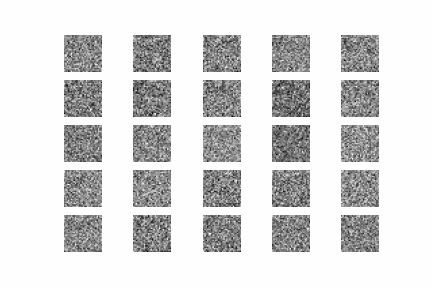

In [ ]:
from IPython.display import Image
Image(open('/content/image.gif','rb').read())
